# **Introducing**



Introduction:
Understanding and accurately predicting weather conditions are pivotal for various aspects of our daily lives, impacting everything from outdoor plans to agricultural practices. In this context, we delve into a dataset spanning around 10 years, collecting daily weather observations from diverse locations across Australia. The primary objective is to predict next-day rain using classification models trained on the target variable, "RainTomorrow." This variable serves as the linchpin for prediction, addressing a straightforward yet impactful question: did it rain the next day, with responses categorized as "Yes" or "No"? Notably, the column is marked as "Yes" if the recorded rainfall on that day measures 1mm or more.

To facilitate this investigation, a dataset sourced from Kaggle is utilized, containing information extracted from predicting next-day rain in Australia. This dataset consists of 145,460 rows and 23 columns.

However, it's crucial to note that the dataset poses challenges as the target variable contains more occurrences of 0 than 1, leading to an imbalanced dataset. This imbalance could affect the model's performance, and addressing this issue is a key consideration in developing accurate predictive models for rainfall occurrences. Despite this challenge, the dataset's richness, comprising extensive weather data from various regions across Australia, presents a valuable opportunity to develop models capable of better predicting rain occurrences. This predictive capability is essential for making informed decisions and planning activities influenced by weather conditions, underscoring the broader significance of accurate weather predictions in our daily lives.

# **Import Libraries**

The libraries needed to model a linear regression include numpy, pandas, sympy, seaborn, matplotlib, dython nominal, joblib, sklearn, and pickle.

In [2]:
import numpy as np
import sympy as sp
import pandas as pd
from dython.nominal import associations

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
mpl.style.use(["ggplot"])

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import pickle

# **Data Loading**

The required dataset will be read by the program.

In [4]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Display the number of rows and columns.

In [5]:
df.shape

(145460, 23)

Summary information about the DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Summary of descriptive statistics from DataFrame

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Descriptive statistics specific to object columns

In [8]:
df.describe(include='object').T

,count,unique,top,freq
Date,145460,3436,2013-11-12,49
Location,145460,49,Canberra,3436
WindGustDir,135134,16,W,9915
WindDir9am,134894,16,N,11758
WindDir3pm,141232,16,SE,10838
RainToday,142199,2,No,110319
RainTomorrow,142193,2,No,110316


# **Data Cleaning**


Data cleaning aims to identify, handle, and clean problems in the dataset. In this program, letters in columns become lowercase.

In [9]:
df.columns = df.columns.str.lower()

Contains information about the number of null values ​​for each column of the DataFrame. The columns with the most null values ​​at the top and ordered in descending order.

In [10]:
df_null=pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
df_null.index.name='Columns'
df_null.columns=['Null Values']
df_null.reset_index()

,Columns,Null Values
0,sunshine,69835
1,evaporation,62790
2,cloud3pm,59358
3,cloud9am,55888
4,pressure9am,15065
5,pressure3pm,15028
6,winddir9am,10566
7,windgustdir,10326
8,windgustspeed,10263
9,humidity3pm,4507


As it can be seen, *sunshine*, *evaporation*, *cloud3pm*, and *cloud9am* features have lots of *NaN* values. Replacing those might increase the inaccuracy of the dataset. Thus, those features can be dropped instead. Furthermore, *date* feature can be dropped as well because this isn't a time series analysis.

In [11]:
df = df.drop(['date','sunshine','evaporation','cloud3pm','cloud9am'],axis=1)

Display the names of columns that fall into the non-numeric category and the columns that fall into the numeric category.

In [12]:
cat = df.columns[df.dtypes == object]
num = df.columns[df.dtypes != object]

print(f"Categorical Columns\t: {list(cat)}")
print(f"Numerical Columns\t: {list(num)}")

Categorical Columns	: ['location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday', 'raintomorrow']
Numerical Columns	: ['mintemp', 'maxtemp', 'rainfall', 'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm']


Filling missing values in each categorical column (object) with the mode value of that respective column.

In [13]:
for i in cat:
    df[i] = df[i].fillna(df[i].mode().values[0])

Filling missing values in each numeric column with the mean value of that respective column.

In [14]:
for i in num:
    df[i] = df[i].fillna(df[i].mean())

Count of the null values for each column.

In [15]:
df.isnull().sum()

location         0
mintemp          0
maxtemp          0
rainfall         0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
dtype: int64

Find the correlation between numerical and categorical variables with the help of *dython* library.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


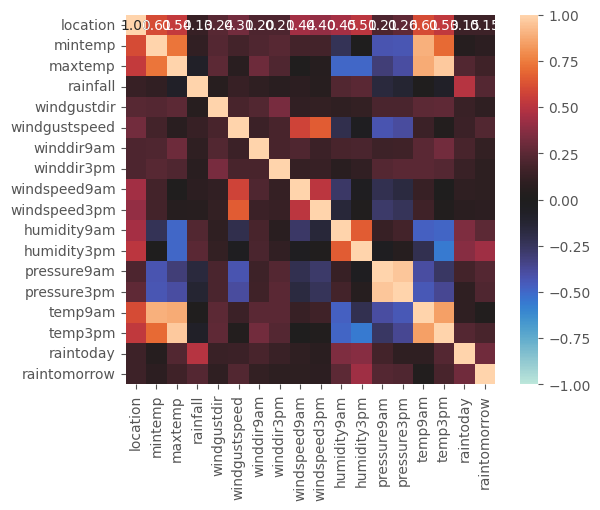

In [16]:
corr = associations(df)

Because we want to know which features that affect the *raintomorrow* the most and reduce the computational cost as well, we'll sort the correlation coefficients in descending order and take only the top 10. The $+$ and $-$ signs only indicate the direction of the linear relationship between two variables, thus we can sort by the absolute values of the correlation coefficients to make sorting easier.

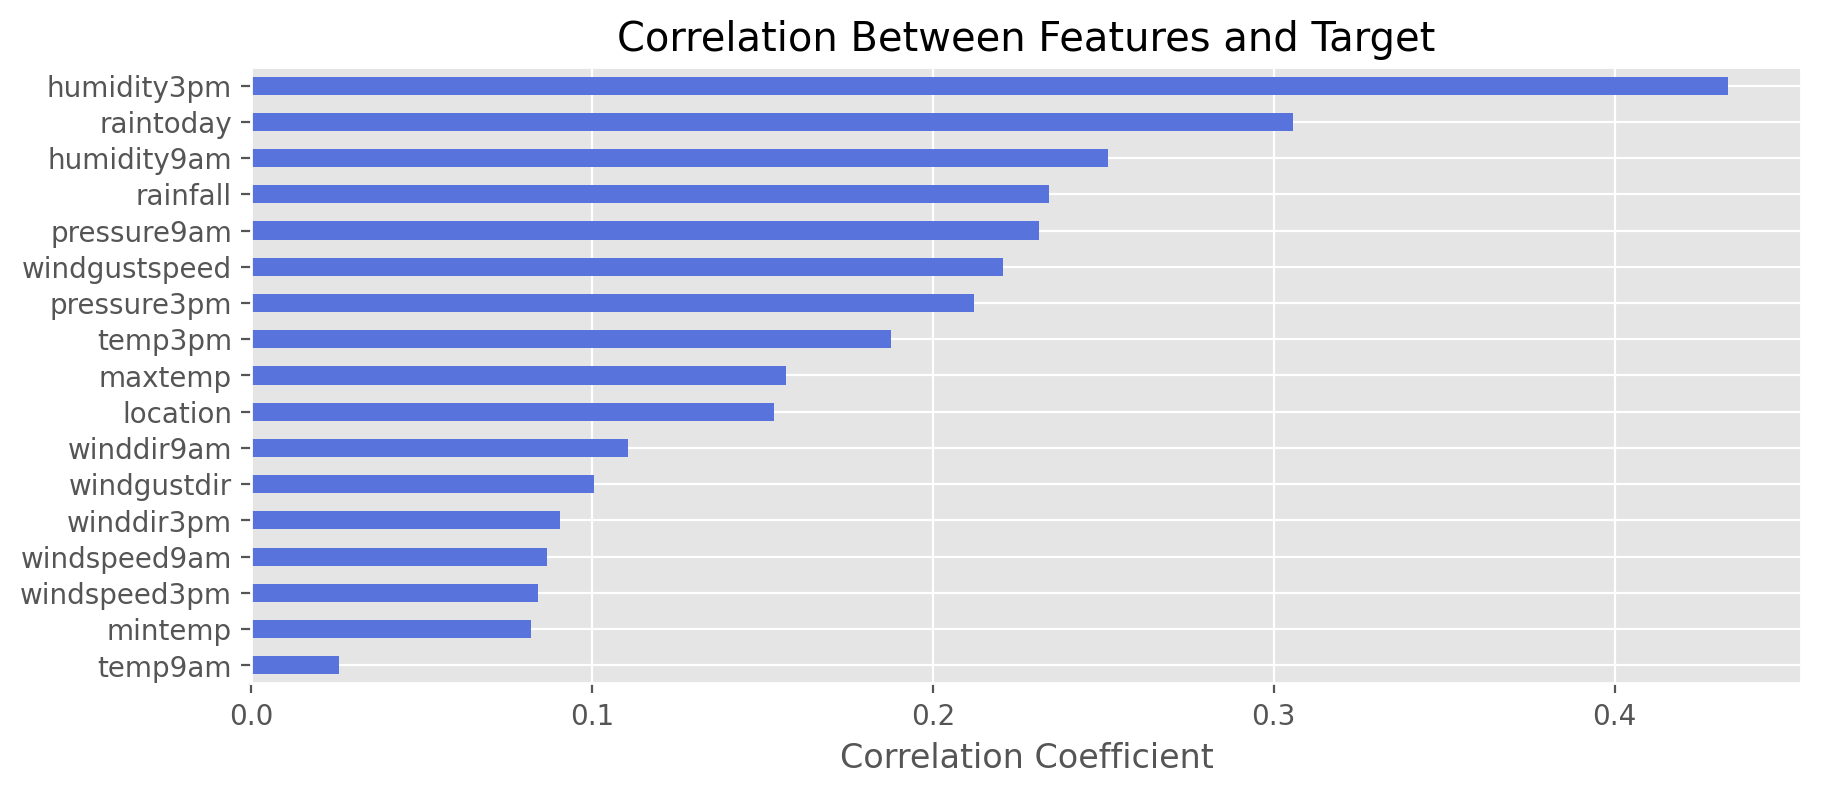

In [17]:
top_10_corr = abs(corr["corr"][["raintomorrow"]].drop("raintomorrow")).sort_values("raintomorrow",ascending=False)

fig = plt.figure(figsize=(10,4),dpi=200)
top_10_corr.sort_values("raintomorrow").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.title("Correlation Between Features and Target")
plt.xlabel("Correlation Coefficient")
plt.show()


Remove the *temp9am* column from the DataFrame.

In [18]:
df = df.drop(['temp9am'],axis=1)

# **Data Exploration**

Analyze and visualize the frequency of rain today and tomorrow.

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

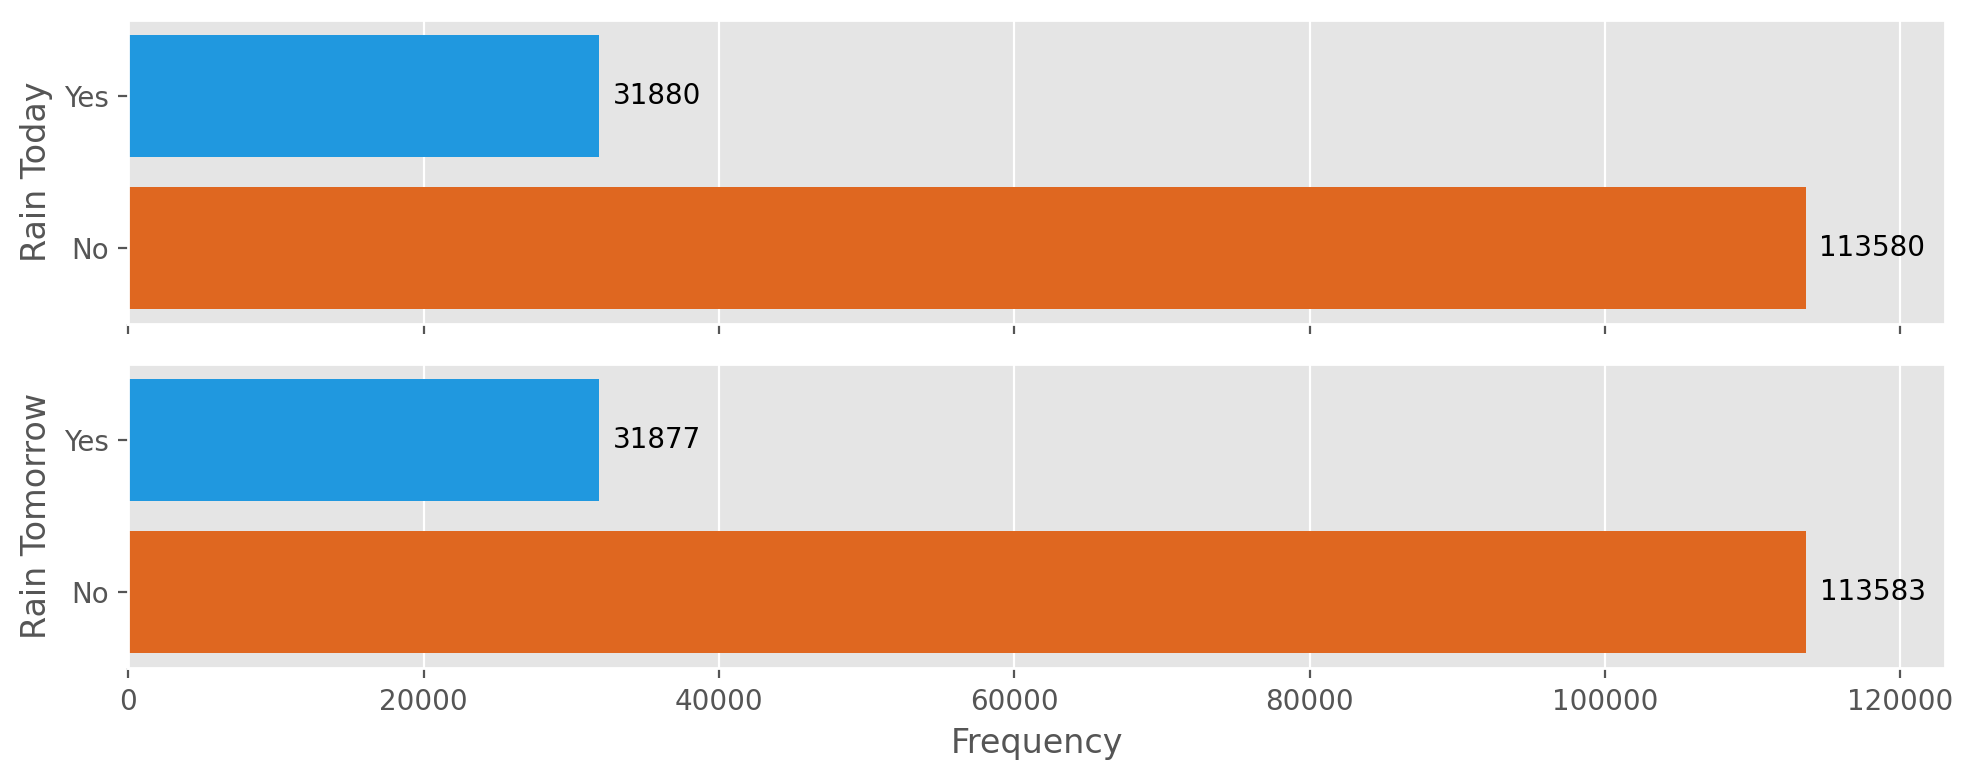

In [19]:
nrows,ncols = 2,1
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i,j,k in zip(range(nrows),["raintoday","raintomorrow"],["Rain Today","Rain Tomorrow"]):
    countplot = sns.countplot(data=df,y=j,palette=["#00A0FF","#FF5F00"],order=["Yes","No"],ax=ax[i])
    for l in countplot.containers:
        countplot.bar_label(l,padding=5)
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,123000)
    ax[i].set_ylabel(k)

ax[1].set_xlabel("Frequency")
plt.tight_layout()
plt.show()

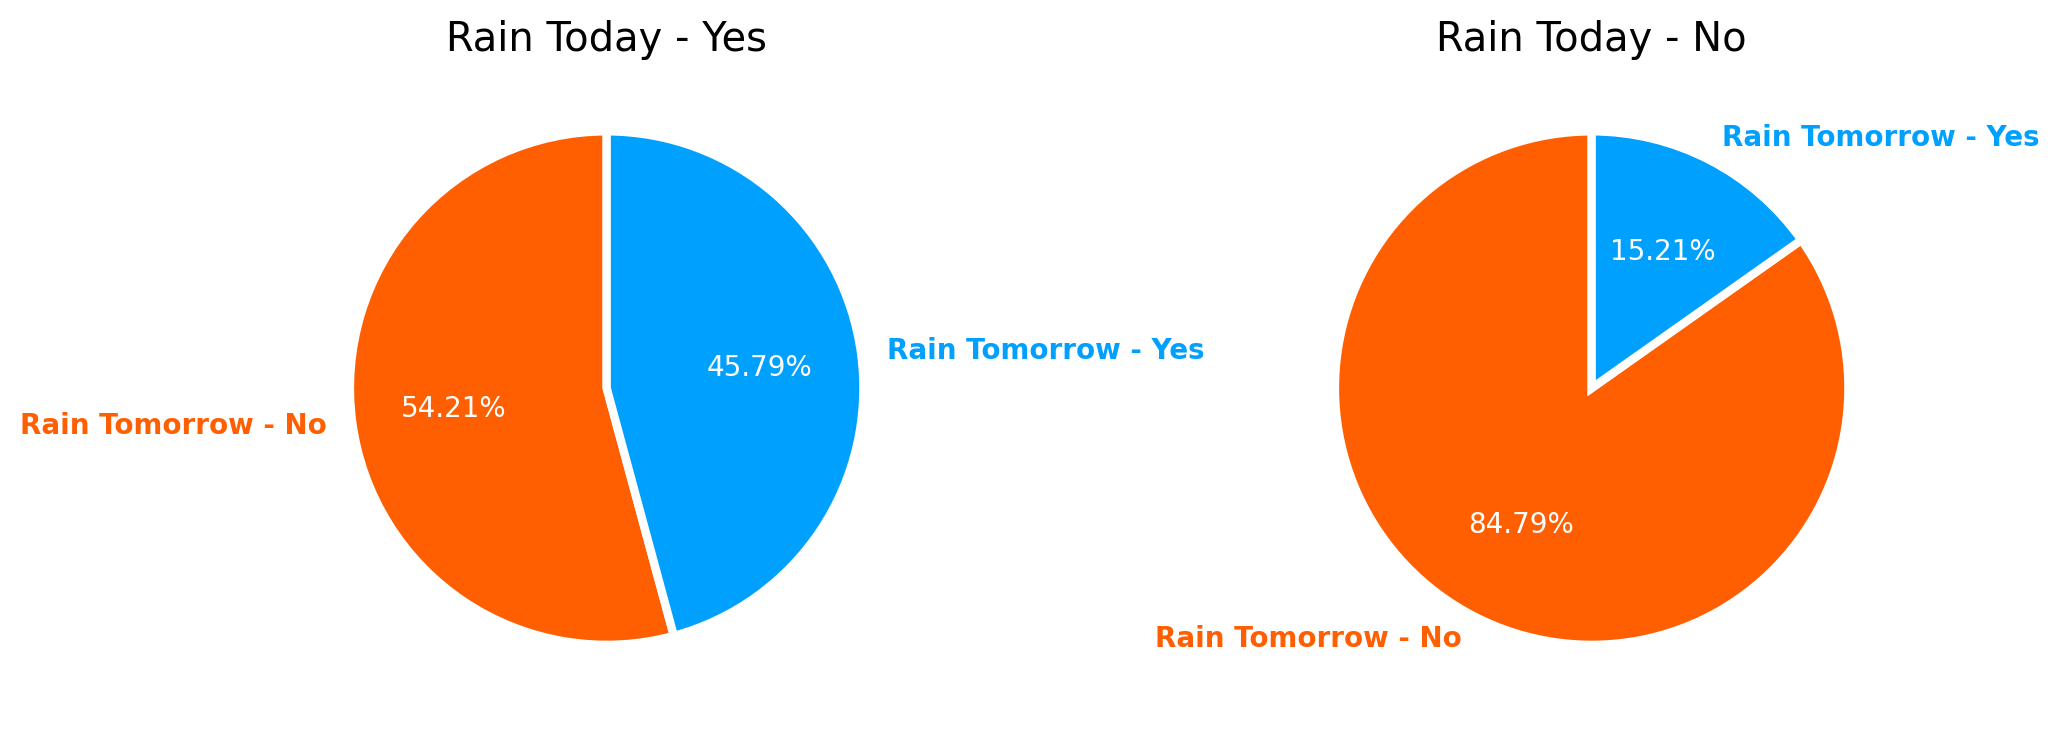

In [20]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["raintoday","raintomorrow"]).count()[["location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        colors=["#FF5F00","#00A0FF"],
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")

plt.tight_layout()
plt.show()

# **Data Pre-processing**

Because LabelEncoder object is created and applied to the categorical columns, converting string or categorical values into numeric values, the categorical columns were removed from the original DataFrame. So, the output consists of two DataFrames: the label-encoded categorical columns, and the non-categorical columns.

In [21]:
#df_encode = pd.get_dummies(df[list(cat[:5])]).astype('int')
le = LabelEncoder()
df_encode=df[list(cat)].apply(le.fit_transform)
df_not_encode = df.drop(list(cat),axis=1)

The DataFrame that was split into two is merged back into a new DataFrame. Here we get back a DataFrame that contains all the original columns, with the categorical columns that have been encoded.

In [22]:
df = pd.concat([df_not_encode,df_encode], axis=1)
df.head()

,mintemp,maxtemp,rainfall,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp3pm,location,windgustdir,winddir9am,winddir3pm,raintoday,raintomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,21.8,2,13,13,14,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,24.3,2,14,6,15,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,23.2,2,15,13,15,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,26.5,2,4,9,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,29.7,2,13,1,7,0,0


Define features (X) and target (y) variables.

In [23]:
X = df.drop("raintomorrow",axis=1)
y = df["raintomorrow"]

Divide the dataset into two parts, training data and testing data with a ratio of 80:20.

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1369)

print(f"Training dataset\t: {len(X_train)}")
print(f"Testing dataset\t\t: {len(X_test)}")

Training dataset	: 116368
Testing dataset		: 29092


Perform feature scaling on training data and testing data.

In [25]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# **Model Definition**

Prepare a model that will be used to study the logistic regression (log_model) and support vector machine (SVM) (svm_model) relationships between features and a target variable with an emphasis on handling class imbalance.

In [26]:
log_model = LogisticRegression(class_weight="balanced",random_state=42,max_iter=5000)

In [27]:
svm_model = SVC(class_weight="balanced",random_state=42)

# **Testing Model**

Train a model using training data.

Logistic Regression

In [28]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)

Use a pre-trained logistic regression model to make predictions on data testing.

In [29]:
log_pred = log_model.predict(scaled_X_test)

Support Vector Machine (SVM)

In [30]:
svm_model.fit(scaled_X_train,y_train)

SVC(class_weight='balanced', random_state=42)

Use a pre-trained svm model to make predictions on data testing.

In [31]:
svm_pred = svm_model.predict(scaled_X_test)

# **Evaluating Model**

Measuring how well a model can make predictions on data.

In the target variable, the occurrence of 0 is more frequent than 1, leading to data imbalance. As a response to this imbalance, four metrics—accuracy, recall, precision, and F1 score—are employed.

Logistic Regression

Calculates and rounds the accuracy, precision, recall, and F1 score metrics for a logistic regression model's predictions on a test set.

In [32]:
log_accuracy=np.round(accuracy_score(y_test,log_pred),3)
log_precision=np.round(precision_score(y_test,log_pred),3)
log_recall=np.round(recall_score(y_test,log_pred),3)
log_f1=np.round(f1_score(y_test,log_pred),3)

Generate and display a confusion matrix for logistic regression predictions on a test set, and prints the corresponding accuracy score.

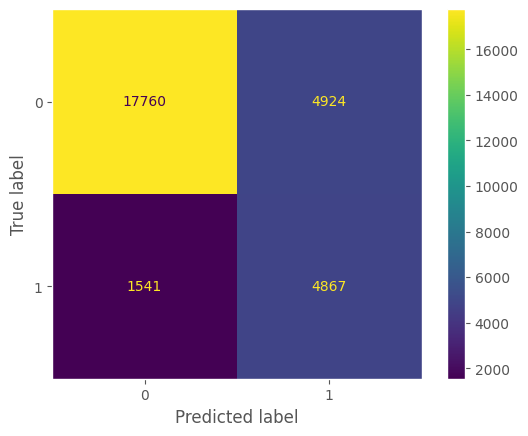

Accuracy Score: 77.8%


In [33]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,log_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {log_accuracy*100}%")

A comprehensive classification report for the logistic regression model.

In [34]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85     22684
           1       0.50      0.76      0.60      6408

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



Evaluation metrics for the logistic regression model.

In [35]:
log_score = {
    'Model': 'Logistic Regression',
    'Accuracy': log_accuracy,
    'Precision': log_precision,
    'Recall': log_recall,
    'f1': log_f1
}
log_score = pd.DataFrame(log_score, index=[''])
log_score

,Model,Accuracy,Precision,Recall,f1
,Logistic Regression,0.778,0.497,0.76,0.601


SVM

Calculates and rounds the accuracy, precision, recall, and F1 score metrics for a SVM model's predictions on a test set

In [36]:
svm_accuracy=np.round(accuracy_score(y_test,svm_pred),3)
svm_precision=np.round(precision_score(y_test, svm_pred),3)
svm_recall=np.round(recall_score(y_test, svm_pred),3)
svm_f1=np.round(f1_score(y_test, svm_pred),3)

Generate and display a confusion matrix for SVM predictions on a test set, and prints the corresponding accuracy score.

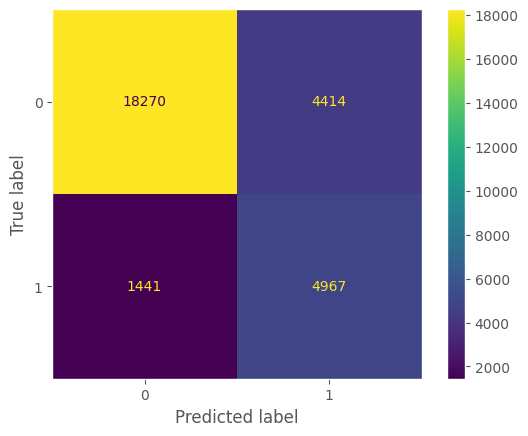

Accuracy Score: 79.9%


In [37]:
plt.figure(dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test,svm_pred,ax=plt.gca())
plt.grid(False)
plt.show()

print(f"Accuracy Score: {svm_accuracy*100}%")

A comprehensive classification report for the SVM model.

In [38]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86     22684
           1       0.53      0.78      0.63      6408

    accuracy                           0.80     29092
   macro avg       0.73      0.79      0.75     29092
weighted avg       0.84      0.80      0.81     29092



Evaluation metrics for the SVM model.

In [39]:
svm_score = {
    'Model': 'Support Vector Machine',
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'f1': svm_f1
}
svm_score = pd.DataFrame(svm_score, index=[''])
svm_score

,Model,Accuracy,Precision,Recall,f1
,Support Vector Machine,0.799,0.529,0.775,0.629


Concatenates and combines evaluation scores from logistic regression and SVM

In [40]:
all_model_scores=pd.concat([log_score,svm_score])
all_model_scores

,Model,Accuracy,Precision,Recall,f1
,Logistic Regression,0.778,0.497,0.760,0.601
,Support Vector Machine,0.799,0.529,0.775,0.629


Creating a grouped bar plot visualizing the different evaluation metrics (Scores) for each machine learning model (logistic regression and SVM).

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is 

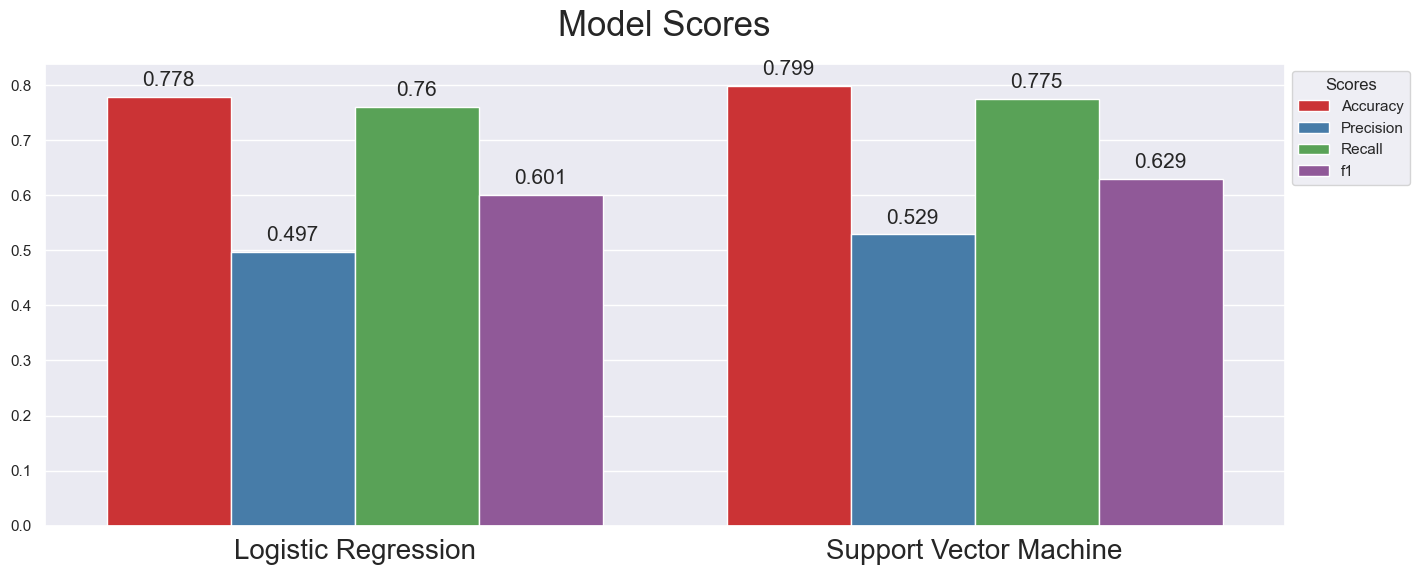

In [41]:
all_model_melted = pd.melt(all_model_scores, id_vars='Model', var_name='Scores', value_name='Values')

sns.set(style="darkgrid")
sns.set_palette("Set1")
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Model", y="Values", hue="Scores", data=all_model_melted)
for i in ax.containers:
    ax.bar_label(i,padding=5,size=15)

ax.legend(title="Scores", loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Model Scores",size=25,pad=20)
plt.xticks(size=20)
plt.xlabel("")
plt.ylabel("")
plt.show()


Compare the actual and predicted values of a logistic regression and SVM model that has been obtained.

In [42]:
actual_vs_predict = pd.DataFrame({'Actual': y_test,
                                  'Linear Regression Prediction': log_pred,
                                  'Support Vector Machine': svm_pred}).reset_index(drop=True)
actual_vs_predict

,Actual,Linear Regression Prediction,Support Vector Machine
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
29087,0,1,1
29088,0,0,0
29089,1,0,0
29090,1,1,1


Save any final models for future use such as to make data's prediction that has never been seen before.

In [43]:
final_log_model = LogisticRegression(class_weight="balanced",max_iter=5000)
final_svm_model = SVC(class_weight="balanced")

for i,j in zip([final_log_model,final_svm_model],['log.pkl','svm.pkl']):
    pickle.dump(i, open(j, 'wb'))
    print(j,"has been saved successfully!")

log.pkl has been saved successfully!
svm.pkl has been saved successfully!


# **Conclusion**

The predictive modeling of "RainTomorrow" using logistic regression and Support Vector Machine (SVM) has yielded successful outcomes. In determining the most influential features affecting rain predictions while considering computational efficiency, the top 10 correlated features were selected after sorting correlation coefficients in descending order, with the exception of excluding 'temp9am.' Analysis of rain occurrences today and their correlation with tomorrow's rain frequency provided valuable insights into weather patterns. However, it's crucial to note the data imbalance in the target variable, where occurrences of 0 outweigh those of 1, prompting the utilization of accuracy, recall, precision, and F1 score metrics for evaluation. These metrics serve as crucial indicators of model performance, where higher values signify enhanced predictive capabilities.